In [1]:
import numpy as np
import pandas as pd

train (2337, 17)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
723,U-7130411Q,MINI CooperSE,business,electro,5.14,2015,81530,2020,47.50,break_bug,5.438506,1.514319e+07,0.57,123.188604,-2.716477,174,173
1378,k-2258315m,Kia Sportage,standart,petrol,6.18,2014,63172,2015,47.87,engine_ignition,4.276034,8.462497e+06,0.10,173.354559,-11.242342,174,173
838,e78136849E,VW Tiguan,economy,petrol,2.80,2013,41827,2022,76.65,another_bug,4.868736,1.325680e+07,0.10,180.000000,13.101523,174,169


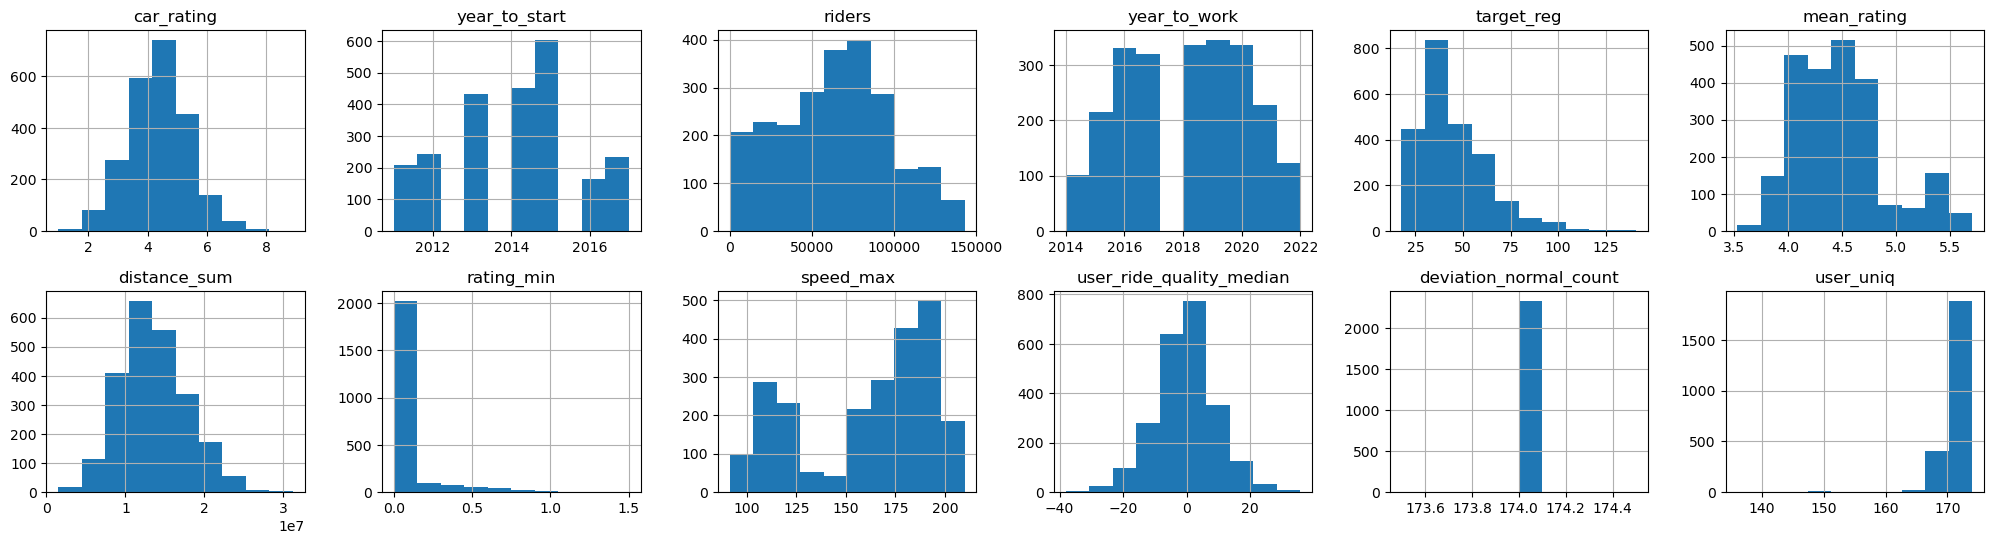

In [2]:
path = "../data/quickstart_train.csv"
train = pd.read_csv(path)

print("train", train.shape)
train.hist(figsize=(25, 6), layout=(-1, 6))
train.sample(3)

In [3]:
cat_features = ["model", "car_type", "fuel_type"]  # Выделяем категориальные признаки
targets = ["target_class", "target_reg"]
features2drop = ["car_id"]  # Эти фичи будут удалены

# Отбираем итоговый набор признаков для использования моделью
filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]

print("cat_features", cat_features)
print("num_features", len(num_features))
print("targets", targets)

for c in cat_features:  # Избавлеямся от NaN'ов
    train[c] = train[c].astype(str)



cat_features ['model', 'car_type', 'fuel_type']
num_features 11
targets ['target_class', 'target_reg']


In [4]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

In [5]:
print(help(CatBoostClassifier))

Help on class CatBoostClassifier in module catboost.core:

class CatBoostClassifier(CatBoost)
 |  CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function=None, border_count=None, feature_border_type=None, per_float_feature_quantization=None, input_borders=None, output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, best_model_min_trees=None, verbose=None, silent=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, target_border=None, classes_count=None, class_weights=None, auto_class_weights=None, class_names=None, one_hot_max_size=None, random_strength=None, random_score_type=None, name=None, ignored_feature

In [7]:
from sklearn.model_selection import train_test_split

X = train[filtered_features].drop(targets, axis=1, errors="ignore")
y = train["target_class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
clf = CatBoostClassifier(thread_count=-1,
                         random_seed=42,
                         cat_features=cat_features)

clf.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=200,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=100,
)

Learning rate set to 0.109335
0:	learn: 1.8108068	test: 1.8310378	best: 1.8310378 (0)	total: 144ms	remaining: 2m 24s
200:	learn: 0.2789378	test: 0.5441162	best: 0.5374049 (156)	total: 15.7s	remaining: 1m 2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5374048663
bestIteration = 156

Shrink model to first 157 iterations.


In [9]:
clf = CatBoostClassifier(iterations=100,
                         thread_count=-1,
                         random_seed=42,
                         cat_features=cat_features)

clf.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=10,
    use_best_model=True,
    early_stopping_rounds=50,
)

Learning rate set to 0.263488
0:	learn: 1.5180267	test: 1.5292177	best: 1.5292177 (0)	total: 52ms	remaining: 5.14s
10:	learn: 0.5942287	test: 0.6609974	best: 0.6609974 (10)	total: 542ms	remaining: 4.38s
20:	learn: 0.5086990	test: 0.6046452	best: 0.6046452 (20)	total: 1.05s	remaining: 3.94s
30:	learn: 0.4489243	test: 0.5761154	best: 0.5761154 (30)	total: 1.56s	remaining: 3.48s
40:	learn: 0.4020685	test: 0.5688007	best: 0.5684894 (33)	total: 2.13s	remaining: 3.06s
50:	learn: 0.3600712	test: 0.5740101	best: 0.5681639 (46)	total: 2.65s	remaining: 2.54s
60:	learn: 0.3375750	test: 0.5737759	best: 0.5681639 (46)	total: 3.15s	remaining: 2.02s
70:	learn: 0.3129667	test: 0.5697338	best: 0.5678971 (68)	total: 3.66s	remaining: 1.5s
80:	learn: 0.2922667	test: 0.5678989	best: 0.5657195 (76)	total: 4.17s	remaining: 979ms
90:	learn: 0.2685586	test: 0.5679290	best: 0.5657195 (76)	total: 4.7s	remaining: 465ms
99:	learn: 0.2537216	test: 0.5724496	best: 0.5657195 (76)	total: 5.17s	remaining: 0us

bestTest

In [10]:
clf.get_feature_importance(prettified=True)

,Feature Id,Importances
0,speed_max,34.336544
1,mean_rating,34.158117
2,rating_min,13.206289
3,model,4.214882
4,user_uniq,2.792148
5,car_type,2.422167
6,user_ride_quality_median,2.215881
7,distance_sum,2.068688
8,riders,1.730535
9,year_to_work,1.185616


In [11]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

In [12]:
from sklearn.model_selection import KFold  # k-фолдная валидация

In [13]:
n_splits = 3  # Число фолдов. Оптимально 3, 5 или 10
clfs = [] # Тут будем сохранять модели
scores = [] # Тут — хранить скоры валидационных фолдов

# Параметры валидации, обучение будет идти на n_splits фолдах
X = train[filtered_features].drop(targets, axis=1, errors="ignore")
y = train["target_class"]

kf = KFold(n_splits=n_splits, shuffle=True, random_state=7575)
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Специальный класс для ускорения обучения 
    train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_features)
    eval_dataset = Pool(data=X_test, label=y_test, cat_features=cat_features)

    clf = CatBoostClassifier(
        depth=4,
        iterations=3500,
        learning_rate=0.06,
        loss_function="MultiClass",  # MultiLogloss
        # eval_metric = 'Precision',  F1:macro / AUC:hints=skip_train~false
        custom_metric=["Recall"],  # 'AUC / Accuracy,
        
        # Главная фишка CatBoost — работа с категориальными признаками
        cat_features=cat_features,
        # ignored_features = ignored_features,
        
        # Регуляризация и ускорение
        colsample_bylevel=0.098,
        subsample=0.95,
        l2_leaf_reg=9,
        min_data_in_leaf=243,
        max_bin=187,
        random_strength=1,
        
        # Параметры ускорения
        task_type="CPU",    
        thread_count=-1,
        bootstrap_type="Bernoulli", 
        
        # Важное!
        random_seed=7575,
        auto_class_weights="SqrtBalanced",
        early_stopping_rounds=50)

    clfs.append(clf)

    clf.fit(
        train_dataset,
        eval_set=eval_dataset,
        verbose=500,
        use_best_model=True,
        plot=False)

    scores.append(np.mean([v for k, v in clf.best_score_["validation"].items() if "Recall" in k], dtype="float16"))
    # scores.append(clf.best_score_['validation']['MultiClass'])
    # clf.save_model("../tmp_data/cool_catboost_model_{}_deep".format(n))

assert len(clfs) == n_splits
print("mean Recall score --------->", np.mean(scores, dtype="float16") - np.std(scores, dtype="float16"))

0:	learn: 2.1956073	test: 2.1958090	best: 2.1958090 (0)	total: 5.67ms	remaining: 19.9s
500:	learn: 0.4702692	test: 0.5569354	best: 0.5569354 (500)	total: 1.89s	remaining: 11.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5096496804
bestIteration = 916

Shrink model to first 917 iterations.
0:	learn: 2.1951404	test: 2.1964014	best: 2.1964014 (0)	total: 3.17ms	remaining: 11.1s
500:	learn: 0.4909194	test: 0.5563577	best: 0.5562080 (497)	total: 1.86s	remaining: 11.1s
1000:	learn: 0.3967000	test: 0.5050570	best: 0.5050184 (997)	total: 3.79s	remaining: 9.46s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4961039188
bestIteration = 1241

Shrink model to first 1242 iterations.
0:	learn: 2.1956876	test: 2.1960187	best: 2.1960187 (0)	total: 2.53ms	remaining: 8.85s
500:	learn: 0.4706323	test: 0.5434797	best: 0.5434797 (500)	total: 1.91s	remaining: 11.4s
1000:	learn: 0.3921691	test: 0.5102073	best: 0.5102073 (1000)	total: 3.8s	remaining: 9.48s
Stopped b

Всего признаков 14 Усреднее по 3-ти моделям: 
На график нанесено топ-13 признаков


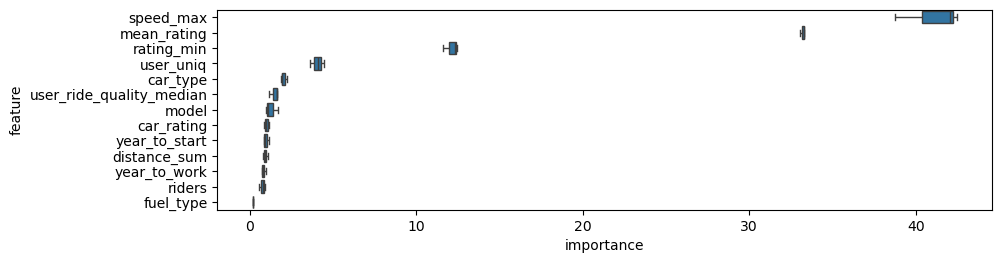

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_importance(df, best_model, height = 0.2, top_n=50):

    fi = pd.DataFrame(index=df.columns, columns=[])
    for i, m in enumerate(best_model):
        fi[f"m_{i}"] = m.get_feature_importance()

    fi = fi.stack().reset_index().iloc[:, [0, 2]]  # .to_frame()
    fi.columns = ["feature", "importance"]

    cols_ord = list(fi.groupby("feature")["importance"].mean().sort_values(ascending=False).index)
    
    print("Всего признаков {} Усреднее по {}-ти моделям: ".format(len(cols_ord), len(best_model)))
    cols_ord = cols_ord[:top_n]

    fi = fi[fi["feature"].isin(cols_ord)]

    plt.figure(figsize=(10, len(cols_ord) * height))
    b = sns.boxplot(data=fi, y="feature", x="importance", orient="h", order=cols_ord)

    print("На график нанесено топ-{} признаков".format(top_n))
    return (
        fi.groupby(by=["feature"], as_index=False)["importance"]
        .mean()
        .sort_values(by="importance", ascending=False))


df_feats_imp = plot_importance(
    train[filtered_features].drop(targets, axis=1, errors="ignore"),
    best_model = clfs,
    height = 0.20,
    top_n=13,
)

In [16]:
import shap

shap.initjs()

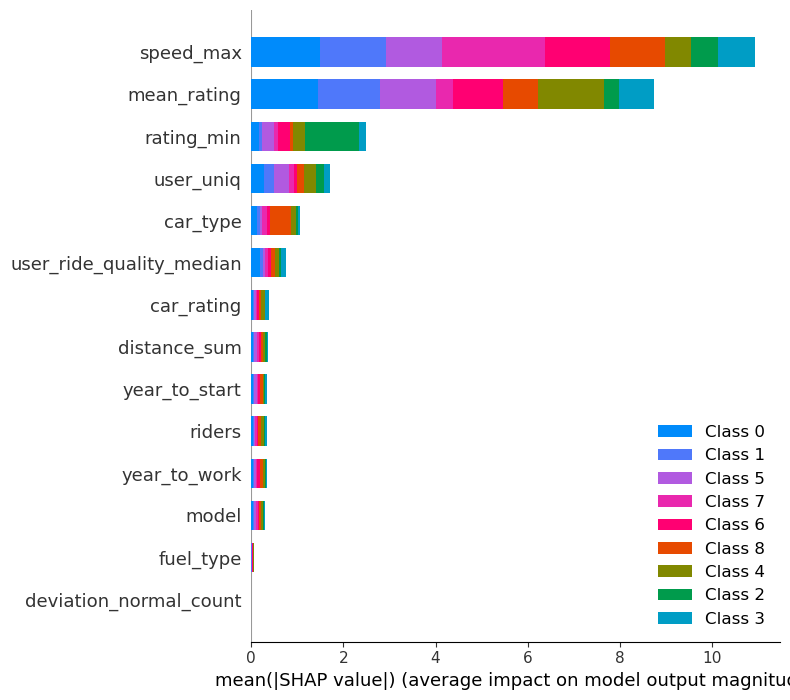

In [17]:
explainer = shap.TreeExplainer(clfs[-1])

train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_features)
shap_values = explainer.shap_values(train_dataset)

shap.summary_plot(shap_values, X_train, max_display=25)

In [21]:
path = "../data/quickstart_test.csv"
sub = pd.read_csv(path)

# Массив для записи финального прогноза size*n_class
y_pred = np.zeros((sub.shape[0], train[targets].nunique()[0]))

# Пробегаемся по моделям каждого фолда и дергаем прогноз 
for n, clf in enumerate(clfs):
    y_pred += clf.predict_proba(sub[filtered_features])

f = lambda x: clf.classes_[x]
sub["target_class"] = list(map(f, y_pred.argmax(axis=1)))

sub[["car_id", "target_class"]].to_csv("../subs/catboost_kfold.csv", index=False)
sub[["car_id", "target_class"]].head()

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,car_id,target_class
0,P17494612l,engine_overheat
1,N-1530212S,electro_bug
2,B-1154399t,break_bug
3,F12725233R,gear_stick
4,l-1139189J,electro_bug


In [22]:
X = train[filtered_features].drop(targets, axis=1, errors="ignore")
y = train["target_reg"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# Обучим модель регрессии
model = CatBoostRegressor(
    random_seed=42, thread_count=-1, cat_features=cat_features, eval_metric="RMSE"
)

model.fit(
    train_pool,
    eval_set=test_pool,
    verbose=100,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=100,
)

Learning rate set to 0.056174
0:	learn: 17.0065561	test: 17.7387430	best: 17.7387430 (0)	total: 6.53ms	remaining: 6.52s
100:	learn: 10.5043228	test: 12.2090243	best: 12.2090243 (100)	total: 411ms	remaining: 3.66s
200:	learn: 9.3900288	test: 12.1591227	best: 12.1374989 (148)	total: 849ms	remaining: 3.37s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 12.1374989
bestIteration = 148

Shrink model to first 149 iterations.


In [24]:
idxs, scores = model.get_object_importance(
    test_pool, train_pool, importance_values_sign="Positive", thread_count=-1
)
len(idxs)

1070

In [25]:
scores[:20]

[1.0760798660350779,
 0.6217592053237175,
 0.28241900661358055,
 0.24956990727651696,
 0.2473919563486811,
 0.24435693957510338,
 0.22605544242815276,
 0.222093088614638,
 0.21411728044697934,
 0.20855406342759,
 0.20814361321622363,
 0.20165304798163927,
 0.2009990077614598,
 0.20085475767541583,
 0.1902886505182502,
 0.18728240775813945,
 0.18727006159768447,
 0.1854390466216923,
 0.18382276655258728,
 0.1773868133984341]

In [26]:
train_pool = Pool(
    X_train.reset_index(drop=True).drop(idxs[:100]),
    y_train.reset_index(drop=True).drop(idxs[:100]),
    cat_features=cat_features,
)

model = CatBoostRegressor(
    random_seed=42, thread_count=-1, cat_features=cat_features, eval_metric="RMSE"
)

model.fit(
    train_pool,
    eval_set=test_pool,
    verbose=100,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=100,
)

Learning rate set to 0.055692
0:	learn: 16.7940672	test: 17.7337852	best: 17.7337852 (0)	total: 4.86ms	remaining: 4.86s
100:	learn: 9.5267039	test: 11.6210027	best: 11.6210027 (100)	total: 454ms	remaining: 4.04s
200:	learn: 8.5490724	test: 11.6513031	best: 11.5690115 (127)	total: 896ms	remaining: 3.56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 11.56901147
bestIteration = 127

Shrink model to first 128 iterations.


In [27]:
from scipy import stats

model = CatBoostRegressor(
    random_seed=42,
    thread_count=-1,
    cat_features=cat_features,
    eval_metric="RMSE",
    verbose=500,
)

param_distribution = {
    "one_hot_max_size": stats.bernoulli(p=0.2, loc=2),
    "learning_rate": [0.03, 0.1, 0.3],
    "l2_leaf_reg": [2, 5, 7],
    "depth": stats.binom(n=10, p=0.2),
}
randomized_search_result = model.randomized_search(param_distribution, X_train, y_train)
model.best_score_

0:	learn: 47.0674623	test: 45.9655438	best: 45.9655438 (0)	total: 6.89ms	remaining: 6.88s
500:	learn: 10.6415766	test: 10.7212807	best: 10.7212807 (500)	total: 1.51s	remaining: 1.5s
999:	learn: 9.8639354	test: 10.6294194	best: 10.6281882 (986)	total: 2.96s	remaining: 0us

bestTest = 10.62818819
bestIteration = 986

0:	loss: 10.6281882	best: 10.6281882 (0)	total: 3.01s	remaining: 27.1s
0:	learn: 47.0674623	test: 45.9655438	best: 45.9655438 (0)	total: 5.63ms	remaining: 5.63s
500:	learn: 10.0592927	test: 10.6205356	best: 10.6205356 (500)	total: 1.87s	remaining: 1.86s
999:	learn: 8.9151340	test: 10.5927770	best: 10.5913618 (997)	total: 3.54s	remaining: 0us

bestTest = 10.59136175
bestIteration = 997

1:	loss: 10.5913618	best: 10.5913618 (1)	total: 6.59s	remaining: 26.3s
0:	learn: 47.0674623	test: 45.9655438	best: 45.9655438 (0)	total: 2.67ms	remaining: 2.67s
500:	learn: 9.5004639	test: 10.5860761	best: 10.5807084 (491)	total: 2.12s	remaining: 2.11s
999:	learn: 7.9455777	test: 10.5549140	be

{'learn': {'RMSE': 7.966412860686576}}

In [28]:
randomized_search_result["params"]

{'depth': 5, 'one_hot_max_size': 3, 'learning_rate': 0.03, 'l2_leaf_reg': 2}

In [29]:
from catboost import CatBoost

fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type="Plain",
    bootstrap_type="Bernoulli",
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    # cat_features = cat_features,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    early_stopping_rounds=10,
)

fast_model.fit(
    train_dataset,
    eval_set=eval_dataset,
    verbose=100,
    # plot=True
);

0:	learn: 2.1616973	test: 2.1612391	best: 2.1612391 (0)	total: 27.7ms	remaining: 4.13s
100:	learn: 0.8112038	test: 0.8361220	best: 0.8361220 (100)	total: 2.89s	remaining: 1.4s
149:	learn: 0.6690084	test: 0.7050471	best: 0.7050471 (149)	total: 4.31s	remaining: 0us

bestTest = 0.7050471238
bestIteration = 149



In [30]:
fs2noshow = [
  "boosting_type","boosting_type","max_ctr_complexity","leaf_estimation_iterations", "rsm","one_hot_max_size",
    "subsample", "depth","task_type","eval_metric","iterations", "loss_function","min_data_in_leaf",
    "learning_rate", "auto_class_weights","classes_count", "random_seed","l2_leaf_reg",
]

for key, value in fast_model.get_all_params().items():
    if key not in fs2noshow:
        print("{}, {}".format(key, value))

nan_mode, Min
combinations_ctr, ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=8:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
sampling_frequency, PerTree
fold_permutation_block, 0
leaf_estimation_method, Newton
od_pval, 0
random_score_type, NormalWithModelSizeDecrease
counter_calc_method, SkipTest
grow_policy, SymmetricTree
penalties_coefficient, 1
model_shrink_mode, Constant
feature_border_type, GreedyLogSum
ctr_leaf_count_limit, 18446744073709551615
bayesian_matrix_reg, 0.10000000149011612
eval_fraction, 0
force_unit_auto_pair_weights, False
random_strength, 1
od_type, Iter
boost_from_average, False
model_size_reg, 0.5
simple_ctr, ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=8:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
pool_metainfo_options, {'tags': {}}
use_best_model, True
od_wait, 1

In [36]:
params = {
    "iterations": 100,
    "learning_rate": 0.001,
    "depth": 7,
    "bootstrap_type": "Bernoulli",
    "subsample": 0.9,
    "random_seed": 7575,
}


clf = CatBoostClassifier(**params)

clf = clf.fit(train_dataset, eval_set=eval_dataset, verbose=False)

print(clf.get_params())

{'iterations': 100, 'learning_rate': 0.001, 'depth': 7, 'random_seed': 7575, 'bootstrap_type': 'Bernoulli', 'subsample': 0.9}


In [40]:
clf.save_model("../others/catboost_model.cbm", format="cbm")

In [41]:
new_clf = CatBoostClassifier()
new_clf.load_model("../others/catboost_model.cbm")

In [42]:
print(new_clf.get_params())

{'bootstrap_type': 'Bernoulli', 'verbose': 0, 'iterations': 100, 'loss_function': 'MultiClass', 'depth': 7, 'subsample': 0.9, 'random_seed': 7575, 'learning_rate': 0.001}


# LightGBM

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
1810,l-4181518C,VW Tiguan,economy,petrol,4.20,2016,89745,2020,32.72,electro_bug,4.634310,1.560905e+07,0.0,174.197004,5.384679,174,172
79,I13605989C,VW Tiguan,economy,petrol,4.04,2013,40885,2022,44.19,wheel_shake,4.669023,8.780774e+06,0.1,137.918458,-2.723250,174,173
1386,e-1632869f,VW Polo,economy,petrol,4.48,2015,84498,2015,60.68,engine_overheat,4.045575,1.032614e+07,0.1,188.654268,-6.753600,174,173


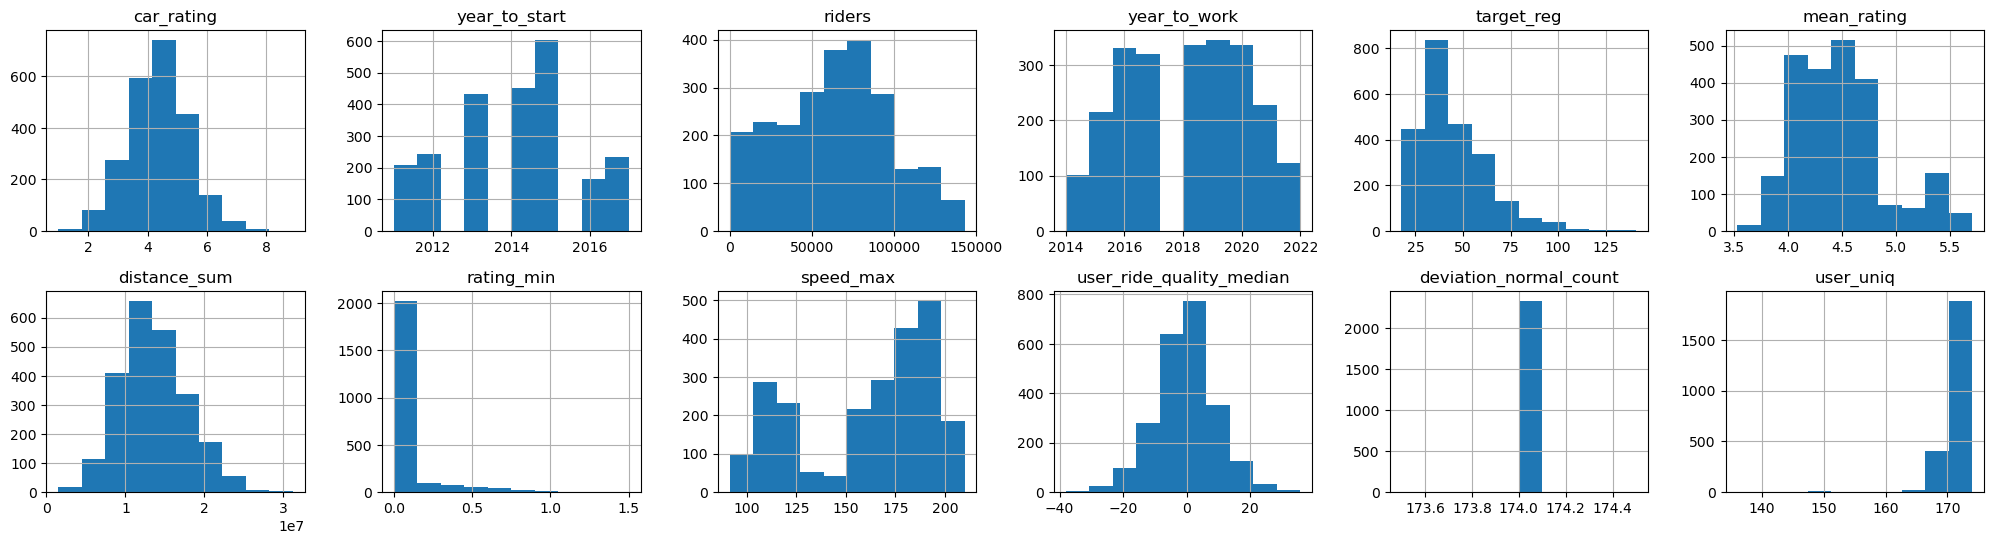

In [2]:
df = pd.read_csv("../data/quickstart_train.csv")
df.hist(figsize=(25, 6), layout=(-1, 6))
df.sample(3)

In [3]:
cat_cols = ["car_type", "fuel_type", "model"]
drop_cols = ["car_id", "target_reg", "target_class"]

X = df.drop(drop_cols, axis=1)
y = df["target_class"]

In [5]:
import lightgbm as lgb

In [6]:
# Переведем категориальные фичи в int с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Таргет также придется перевести из строкового типа в целочисленный
le_tar = LabelEncoder()
y = le_tar.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

In [8]:
from lightgbm import Dataset

train_data = Dataset(
    X_train,
    y_train,
    categorical_feature=cat_cols,
    free_raw_data=False,
)

# Еще валидационный датасет для настройки ранней остановки
val_data = Dataset(
    X_test,
    y_test,
    categorical_feature=cat_cols,
    free_raw_data=False,
)

In [9]:
from lightgbm import LGBMClassifier, train  # ,LGBMRegressor

In [10]:
params = {
    "objective": "multiclass",
    "num_class": 9,
    "verbosity": -1,
}

booster = train(
    params,
    train_set=train_data, # Принимает данные, как класс Dataset 
    valid_sets=(val_data),
    categorical_feature=cat_cols, 
    num_boost_round=10,
)

# В случае мультиклассификации метод predict() возвращает вероятности классов, поэтому используем np.argmax()

test_preds = np.argmax(booster.predict(X_test), axis=1)
print("\nTest Accuracy: %.2f" % accuracy_score(y_test, test_preds))


Test Accuracy: 0.78


In [11]:
# Заметим, что метод fit() не принимает объект класса Dataset
# Поэтому передадим номера категориальных столбцов в параметр cat_feature
clf = LGBMClassifier(
    objective="multiclass",
    n_estimators=10,
    num_class=9,
    seed=42,
    cat_feature=[0, 1, 2], # Нельзя передать список названий столбцов
)

clf.fit(
    X_train,
    y_train,
    eval_set=[
        (X_test, y_test),
    ],
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1636
[LightGBM] [Info] Number of data points in the train set: 1869, number of used features: 13
[LightGBM] [Info] Start training from score -2.134996
[LightGBM] [Info] Start training from score -2.167183
[LightGBM] [Info] Start training from score -2.244892
[LightGBM] [Info] Start training from score -2.134996
[LightGBM] [Info] Start training from score -2.215039
[LightGBM] [Info] Start training from score -2.181301
[LightGBM] [Info] Start training from score -2.048362
[LightGBM] [Info] Start training from score -2.082120
[LightGBM] [Info] Start training from score -2.696877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(cat_feature=[0, 1, 2], n_estimators=10, num_class=9,
               objective='multiclass', seed=42)

In [17]:
boostings = ["gbdt", "dart", "goss"]

for name in boostings:
    clf = LGBMClassifier(
        objective="multiclass",
        n_estimators=10,
        learning_rate=0.1,
        num_class=9,
        reg_alpha=0.5,
        reg_lambda=0.3,
        seed=42,
        cat_feature=[0, 1, 2],
        boosting_type=name,
        verbose=-1,
    )
    clf.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        # verbose=False,
    )
    test_preds = clf.predict(X_test)
    print("{} accuracy: {:.2f}".format(name, accuracy_score(y_test, test_preds)))

gbdt accuracy: 0.79
dart accuracy: 0.79
goss accuracy: 0.79


In [23]:
from lightgbm import early_stopping

clf = lgb.LGBMClassifier(
    objective="multiclass",
    n_estimators=100,
    learning_rate=0.1,
    boosting_type="gbdt",
    cat_feature=[0, 1, 2],
    verbose=-1,
)

clf.fit(
    X_train,
    y_train,
    eval_set=[
        (X_test, y_test),
    ],
    callbacks=[early_stopping(5)],  # Использование функции ранней остановки
)


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.573207


LGBMClassifier(cat_feature=[0, 1, 2], objective='multiclass', verbose=-1)

In [24]:
booster = clf.booster_
booster.save_model("lgb.mod")

In [25]:
loaded_booster = lgb.Booster(model_file="lgb.mod")
test_preds = np.argmax(loaded_booster.predict(X_test), axis=1)
print("Test Accuracy: %.2f" % accuracy_score(y_test, test_preds))

Test Accuracy: 0.78


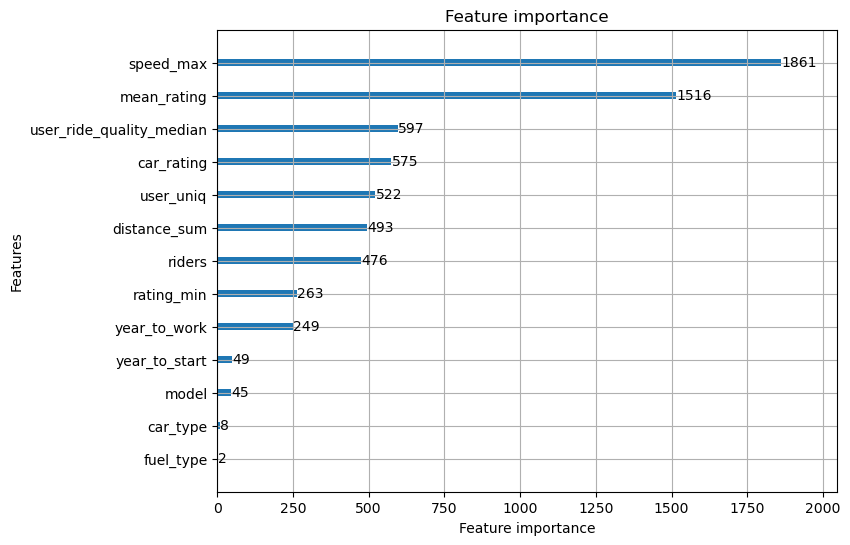

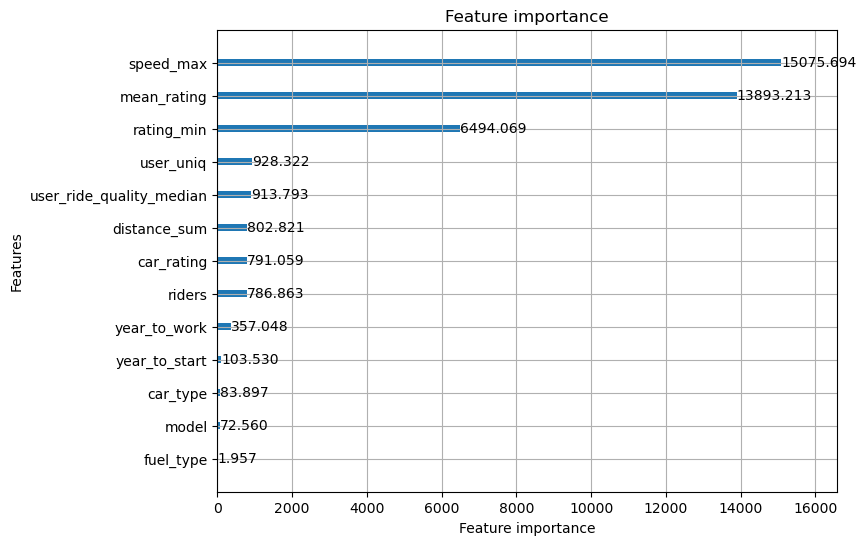

In [26]:
lgb.plot_importance(booster, figsize=(8, 6), importance_type="split")
lgb.plot_importance(booster, figsize=(8, 6), importance_type="gain");

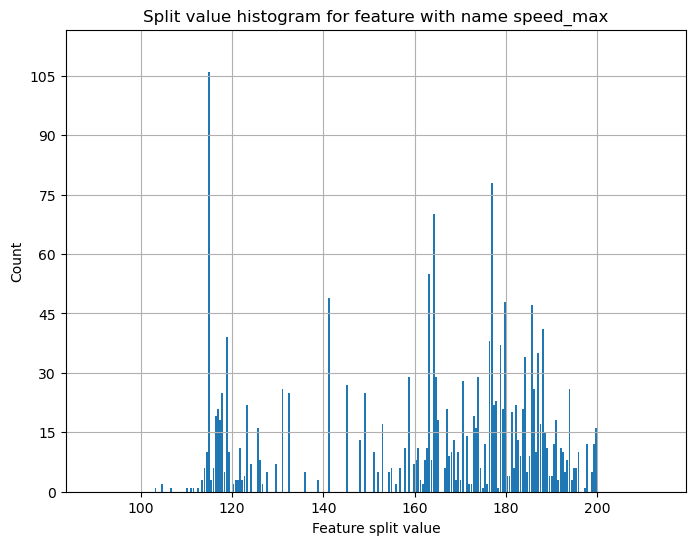

In [27]:
lgb.plot_split_value_histogram(booster, feature="speed_max", figsize=(8, 6));

# XGBoost

In [28]:
import xgboost as xgb

import numpy as np
import pandas as pd

import warnings; warnings.filterwarnings("ignore")

In [29]:
train = pd.read_csv('../data/quickstart_train.csv')
train.head(3)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,4.737759,1.214131e+07,0.1,180.855726,0.023174,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,4.480517,1.803909e+07,0.0,187.862734,12.306011,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,gear_stick,4.768391,1.588366e+07,0.1,102.382857,2.513319,174,173


In [30]:
drop_cols = ['car_id', 'target_reg', 'target_class']
cat_cols = ['car_type', 'fuel_type', 'model']

X = train.drop(drop_cols, axis=1)
y = train['target_reg']

In [31]:
from sklearn.model_selection import train_test_split

# Катфичи приведем в тип 'category'
for col in cat_cols:
    X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
dtrain = xgb.DMatrix(X_train,
                     label=y_train,
                     nthread=-1,
                     enable_categorical=True,)

dtest = xgb.DMatrix(X_test,
                    y_test,
                    nthread=-1,
                    enable_categorical=True)

In [33]:
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist', # 'gpu_hist' # Место для ускорения
    'seed': 42,
}
booster = xgb.train(params,
                    dtrain=dtrain,
                    num_boost_round=30,
                    evals=[(dtrain, 'dtrain'), (dtest, 'dtest')],
                    early_stopping_rounds=10,
                    verbose_eval=5)

[0]	dtrain-rmse:14.51967	dtest-rmse:15.73818
[5]	dtrain-rmse:9.49716	dtest-rmse:12.65256
[10]	dtrain-rmse:7.94051	dtest-rmse:12.71816
[15]	dtrain-rmse:7.23939	dtest-rmse:12.75195
[17]	dtrain-rmse:6.69989	dtest-rmse:12.83047


In [34]:
from sklearn.metrics import mean_squared_error

y_pred = booster.predict(dtest,
                         iteration_range=(0, booster.best_iteration + 1))
mean_squared_error(y_test, y_pred) ** 0.5

12.621295288019933

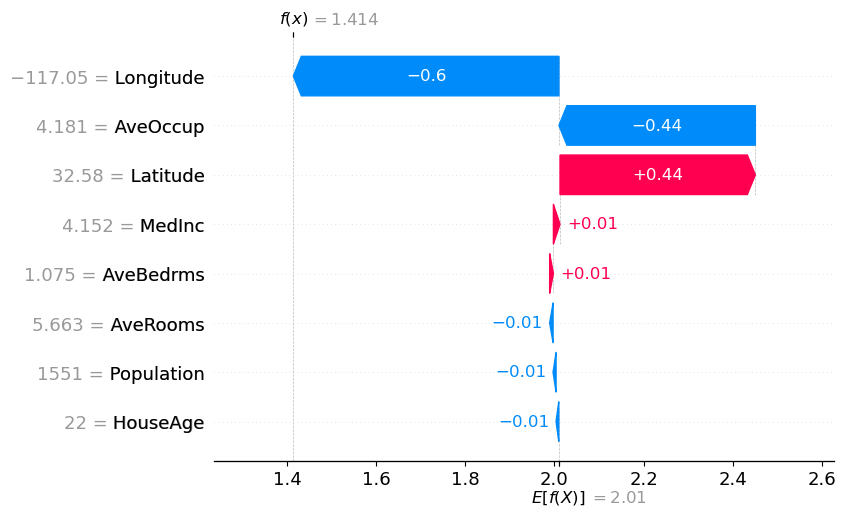

In [11]:
# Установка необходимых библиотек

# Импорт необходимых библиотек
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

# Создание данных для примера
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Обучение модели
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Создание объекта Explainer
explainer = shap.Explainer(model, X_train)

# Вычисление значений SHAP для одного примера
shap_values = explainer(X_test.iloc[[0]])  # Обратите внимание на двойные квадратные скобки

# Построение waterfall plot
shap.waterfall_plot(shap_values[0])  # Доступ к первому (и единственному) элементу в shap_values
plt.show()
